In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math 
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv ('Dados_Kewin/ExportData1.csv')
a=df.values;
Dir = df.iloc[:, 3:4];
Dir=Dir.values
Dir = Dir.reshape(-1,15);

y = ["","3","5","7","9","11", "13", "15", "10", "11", "12", "13", "14"]
x = ["","0.6","0.8", "1.0", "1.2","1.4", "1.6", "1.8", "2.0", "1.4", "1.5", "1.6", "1.7", "1.8", "1.9", "2.0"]





In [7]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="major", color="w", linestyle='-', linewidth=0)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.1f}",
                     size=7,
                     textcolors=("White", "black"),
                     threshold=None, **textkw):

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts




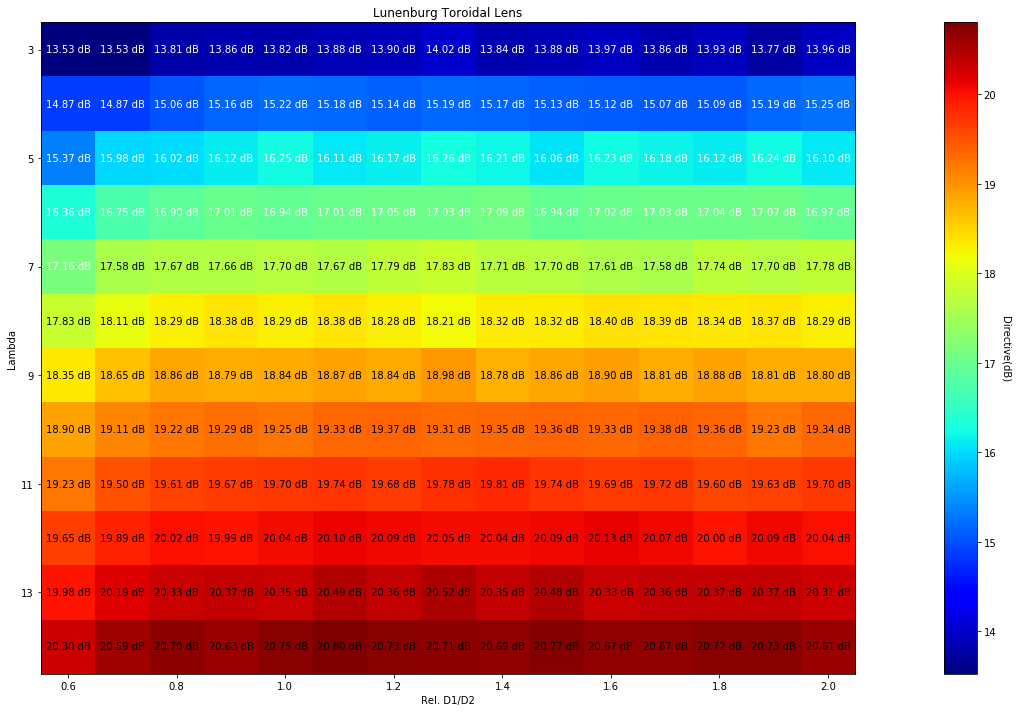

In [8]:
fig, ax = plt.subplots(figsize=(25,10))

im, cbar = heatmap(Dir, y, x, ax=ax,
                   cmap="jet", cbarlabel="Directive(dB)")
texts = annotate_heatmap(im, valfmt="{x:.2f} dB")
ax.set_title("Lunenburg Toroidal Lens")
plt.ylabel('Lambda')
plt.xlabel('Rel. D1/D2')
fig.tight_layout()
plt.show()
fig.savefig('plot.pdf')

In [10]:
print(x)

['0.6', '0.7', '0.8', '0.9', '1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2.0']
